# Mini Project: Transfer Learning with Keras

Transfer learning is a machine learning technique where a model trained on one task is used as a starting point to solve a different but related task. Instead of training a model from scratch, transfer learning leverages the knowledge learned from the source task and applies it to the target task. This approach is especially useful when the target task has limited data or computational resources.

In transfer learning, the pre-trained model, also known as the "base model" or "source model," is typically trained on a large dataset and a more general problem (e.g., image classification on ImageNet, a vast dataset with millions of labeled images). The knowledge learned by the base model in the form of feature representations and weights captures common patterns and features in the data.

To perform transfer learning, the following steps are commonly followed:

1. Pre-training: The base model is trained on a source task using a large dataset, which can take a considerable amount of time and computational resources.

2. Feature Extraction: After pre-training, the base model is used as a feature extractor. The last few layers (classifier layers) of the model are discarded, and the remaining layers (feature extraction layers) are retained. These layers serve as feature extractors, producing meaningful representations of the data.

3. Fine-tuning: The feature extraction layers and sometimes some of the earlier layers are connected to a new set of layers, often called the "classifier layers" or "task-specific layers." These layers are randomly initialized, and the model is trained on the target task with a smaller dataset. The weights of the base model can be frozen during fine-tuning, or they can be allowed to be updated with a lower learning rate to fine-tune the model for the target task.

Transfer learning has several benefits:

1. Reduced training time and resource requirements: Since the base model has already learned generic features, transfer learning can save time and resources compared to training a model from scratch.

2. Improved generalization: Transfer learning helps the model generalize better to the target task, especially when the target dataset is small and dissimilar from the source dataset.

3. Better performance: By starting from a model that is already trained on a large dataset, transfer learning can lead to better performance on the target task, especially in scenarios with limited data.

4. Effective feature extraction: The feature extraction layers of the pre-trained model can serve as powerful feature extractors for different tasks, even when the task domains differ.

Transfer learning is commonly used in various domains, including computer vision, natural language processing (NLP), and speech recognition, where pre-trained models are fine-tuned for specific applications like object detection, sentiment analysis, or speech-to-text.

In this mini-project you will perform fine-tuning using Keras with a pre-trained VGG16 model on the CIFAR-10 dataset.

First, import all the libraries you'll need.

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
#bfrom sklearn.model_selection import train_test_split

### Additional imports by jmd
import matplotlib.pyplot as plt
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.layers import Lambda, Input, Dropout
from tensorflow.keras.callbacks import EarlyStopping

The CIFAR-10 dataset is a widely used benchmark dataset in the field of computer vision and machine learning. It stands for the "Canadian Institute for Advanced Research 10" dataset. CIFAR-10 was created by researchers at the CIFAR institute and was originally introduced as part of the Neural Information Processing Systems (NIPS) 2009 competition.

The dataset consists of 60,000 color images, each of size 32x32 pixels, belonging to ten different classes. Each class contains 6,000 images. The ten classes in CIFAR-10 are [**nb. edited for zero-based indexing**]:

0. Airplane
1. Automobile
2. Bird
3. Cat
4. Deer
5. Dog
6. Frog
7. Horse
8. Ship
9. Truck

The images are evenly distributed across the classes, making CIFAR-10 a balanced dataset. The dataset is divided into two sets: a training set and a test set. The training set contains 50,000 images, while the test set contains the remaining 10,000 images.

CIFAR-10 is often used for tasks such as image classification, object recognition, and transfer learning experiments. The relatively small size of the images and the variety of classes make it a challenging dataset for training machine learning models, especially deep neural networks. It also serves as a good dataset for teaching and learning purposes due to its manageable size and straightforward class labels.

Here are your tasks:

1. Load the CIFAR-10 dataset after referencing the documentation [here](https://keras.io/api/datasets/cifar10/).
2. Normalize the pixel values so they're all in the range [0, 1].
3. Apply One Hot Encoding to the train and test labels using the [to_categorical](https://www.tensorflow.org/api_docs/python/tf/keras/utils/to_categorical) function.
4. Further split the the training data into training and validation sets using [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html). Use only 10% of the data for validation.  

In [2]:
# Load the CIFAR-10 dataset

# https://keras.io/api/datasets/cifar10/

(X_train, y_train), (X_test, y_test) = cifar10.load_data()

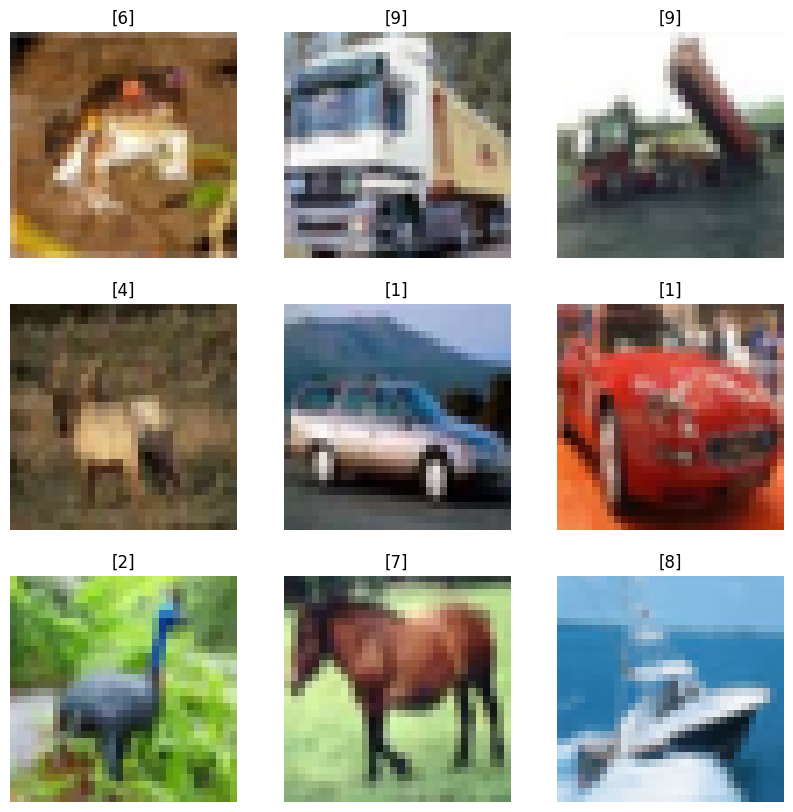

In [3]:
### Show the first 9 images with their labels

# Modified from:
# https://keras.io/api/datasets/cifar10/

plt.figure(figsize = (10, 10))
for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    image = X_train[i]
    plt.imshow(image)
    plt.title(y_train[i])
    plt.axis("off")

In [4]:
# Normalize the pixel values to [0, 1]

X_train = X_train / 255.0
X_test = X_test / 255.0

In [5]:
# One-hot encode the labels

y_train = to_categorical(y_train, num_classes = 10)

# Save the test labels for creating a confusion matrix later
y_test_orig = y_test
y_test = to_categorical(y_test, num_classes = 10)


# # NOTE: One-hot encoding is not necessary if we compute the loss using sparse_categorical_crossentropy
# # For reference, this is how it could be done:

# # https://stackoverflow.com/questions/33681517/tensorflow-one-hot-encoder
# n_labels = 10
# y_train_onehot = np.eye(n_labels)[y_train]
# y_test_onehot = np.eye(n_labels)[y_test]

In [6]:
# Split the data into training and validation sets

# NOTE: Instead of splitting the data here, let's use validation_split in model.fit() (see below)

In [7]:
### Define the inputs and do necessary preprocessing for VGG16

# From https://keras.io/api/applications/vgg/#vgg16-function:
# Note: each Keras Application expects a specific kind of input preprocessing.
# For VGG16, call keras.applications.vgg16.preprocess_input on your inputs before passing them to the model.

inputs = Input(shape = X_train.shape[1:])
inputs = Lambda(preprocess_input)(inputs)

VGG16 (Visual Geometry Group 16) is a deep convolutional neural network architecture that was developed by the Visual Geometry Group at the University of Oxford. It was proposed by researchers Karen Simonyan and Andrew Zisserman in their paper titled "Very Deep Convolutional Networks for Large-Scale Image Recognition," which was presented at the International Conference on Learning Representations (ICLR) in 2015.

The VGG16 architecture gained significant popularity for its simplicity and effectiveness in image classification tasks. It was one of the pioneering models that demonstrated the power of deeper neural networks for visual recognition tasks.

Key characteristics of the VGG16 architecture:

1. Architecture: VGG16 consists of a total of 16 layers, hence the name "16." These layers are stacked one after another, forming a deep neural network.

2. Convolutional Layers: The main building blocks of VGG16 are the convolutional layers. It primarily uses 3x3 convolutional filters throughout the network, which allows it to capture local features effectively.

3. Max Pooling: After each set of convolutional layers, VGG16 applies max-pooling layers with 2x2 filters and stride 2, which halves the spatial dimensions (width and height) of the feature maps and reduces the number of parameters.

4. Fully Connected Layers: Towards the end of the network, VGG16 has fully connected layers that act as a classifier to make predictions based on the learned features.

5. Activation Function: The network uses the Rectified Linear Unit (ReLU) activation function for all hidden layers, which helps with faster convergence during training.

6. Number of Filters: The number of filters in each convolutional layer is relatively small compared to more recent architectures like ResNet or InceptionNet. However, stacking multiple layers allows VGG16 to learn complex hierarchical features.

7. Output Layer: The output layer consists of 1000 units, corresponding to 1000 ImageNet classes. VGG16 was originally trained on the large-scale ImageNet dataset, which contains millions of images from 1000 different classes.

VGG16 was instrumental in showing that increasing the depth of a neural network can significantly improve its performance on image recognition tasks. However, the main drawback of VGG16 is its high number of parameters, making it computationally expensive and memory-intensive to train. Despite this limitation, VGG16 remains an essential benchmark architecture and has paved the way for even deeper and more efficient models in the field of computer vision, such as ResNet, DenseNet, and EfficientNet.

# **Transfer learning**

Here are your tasks:

1. Load [VGG16](https://keras.io/api/applications/vgg/#vgg16-function) as a base model. Make sure to exclude the top layer.
2. Freeze all the layers in the base model. We'll be using these weights as a feature extraction layer to forward to layers that are trainable.

In [8]:
# Load the pre-trained VGG16 model (excluding the top classifier)

# Modified from:
# https://github.com/mjiansun/cifar10-vgg16
# https://stackoverflow.com/questions/42243323/using-keras-with-tensorflow-as-backend-to-train-cifar10-using-vgg16-py-from-kera

base_model = VGG16(weights = "imagenet", include_top = False, input_shape = X_train.shape[1:], classes = 10)
base_model.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 32, 32, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 32, 32, 64)          │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 32, 32, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 16, 16, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 16, 16, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 8, 8, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 8, 8, 256)           │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 8, 8, 256)           │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 8, 8, 256)           │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 4, 4, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 4, 4, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 2, 2, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 2, 2, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 2, 2, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 1, 1, 512)           │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)

In [9]:
# Freeze the layers in the base model

# Modified from:
# https://keras.io/guides/transfer_learning/

# Freeze the base model
base_model.trainable = False

# We make sure that the base_model is running in inference mode here, by passing `training=False`.
x = base_model(inputs, training = False)

Now, we'll add some trainable layers to the base model.

1. Using the base model, add a [GlobalAveragePooling2D](https://keras.io/api/layers/pooling_layers/global_average_pooling2d/) layer, followed by a [Dense](https://keras.io/api/layers/core_layers/dense/) layer of length 256 with ReLU activation. Finally, add a classification layer with 10 units, corresponding to the 10 CIFAR-10 classes, with softmax activation.
2. Create a Keras [Model](https://keras.io/api/models/model/) that takes in approproate inputs and outputs.

In [10]:
# Add a global average pooling layer

x = GlobalAveragePooling2D()(x)

In [11]:
# Add a fully connected layer with 256 units and ReLU activation

x = Dense(units = 256, activation = "relu")(x)

In [12]:
### Added by jmd: Regularize with dropout
### cf. https://keras.io/guides/transfer_learning/

x = Dropout(0.2)(x)

In [13]:
# Add the final classification layer with 10 units (for CIFAR-10 classes) and softmax activation

outputs = Dense(units = 10, activation = "softmax")(x)

In [14]:
# Create the fine-tuned model

model = Model(inputs, outputs)
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ keras_tensor_3CLONE (InputLayer)     │ (None, 32, 32, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ vgg16 (Functional)                   │ (None, 1, 1, 512)           │      14,714,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 512)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,848,586 (56.64 MB)

 Trainable params: 133,898 (523.04 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

With your model complete it's time to train it and assess its performance.

1. Compile your model using an appropriate loss function. Feel free to play around with the optimizer, but a good starting optimizer might be Adam with a learning rate of 0.001.
2. Fit your model on the training data. Use the validation data to print the accuracy for each epoch. Try training for 10 epochs. Note, training can take a few hours so go ahead and grab a cup of coffee.

**Optional**: See if you can implement an [Early Stopping](https://keras.io/api/callbacks/early_stopping/) criteria as a callback function.

In [15]:
# Compile the model

# Note: If we were using integer labels (without one-hot encoding), we could use sparse_categorical_crossentropy
# See https://stats.stackexchange.com/questions/326065/cross-entropy-vs-sparse-cross-entropy-when-to-use-one-over-the-other

model.compile(optimizer = Adam(learning_rate = 0.001), loss = "categorical_crossentropy", metrics = ["accuracy"])

In [16]:
# Train the model

# Instantiate an early stopping callback
early_stopping = EarlyStopping(monitor = "val_loss", patience = 5)
# Train the model with the callback
model.fit(X_train, y_train, epochs = 20, validation_split = 0.2, verbose = 1, callbacks = [early_stopping])

Epoch 1/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.4384 - loss: 1.5949 - val_accuracy: 0.5615 - val_loss: 1.2449
Epoch 2/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.5714 - loss: 1.2285 - val_accuracy: 0.5931 - val_loss: 1.1789
Epoch 3/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.5957 - loss: 1.1572 - val_accuracy: 0.5889 - val_loss: 1.1697
Epoch 4/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.6079 - loss: 1.1155 - val_accuracy: 0.5963 - val_loss: 1.1502
Epoch 5/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.6249 - loss: 1.0739 - val_accuracy: 0.6023 - val_loss: 1.1330
Epoch 6/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.6382 - loss: 1.0428 - val_accuracy: 0.6083 - val_loss: 1.1275
Epoch 7/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.6382 - loss: 1.0165 - val_accuracy: 0.6084 - val_loss: 1.1360
Epoch 8/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.6519 - loss: 0.9920 -

With your model trained, it's time to assess how well it performs on the test data.

1. Use your trained model to calculate the accuracy on the test set. Is the model performance better than random?
2. Experiment! See if you can tweak your model to improve performance.  

In [17]:
# Evaluate the model on the test set

# https://www.tensorflow.org/api_docs/python/tf/keras/Model#evaluate

evals = model.evaluate(X_test, y_test)
print(f'model loss on test set: {evals[0]}')
print(f'accuracy on test set: {evals[1]}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6163 - loss: 1.1347
model loss on test set: 1.1345983743667603
accuracy on test set: 0.6201000213623047


# **Fine-tuning**

### (This section was added by jmd)

To perform **Fine-tuning** we should unfreeze all the layers (including those taken from VGG16) and train the model on our data using a low learning rate.

In [18]:
# Modified from:
# https://keras.io/guides/transfer_learning/

# Unfreeze the base model
base_model.trainable = True
model.summary(show_trainable = True)

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┳━━━━━━━━━┓
┃ Layer (type)                        ┃ Output Shape                 ┃       Param # ┃ Traina… ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━╇━━━━━━━━━┩
│ keras_tensor_3CLONE (InputLayer)    │ (None, 32, 32, 3)            │             0 │    -    │
├─────────────────────────────────────┼──────────────────────────────┼───────────────┼─────────┤
│ vgg16 (Functional)                  │ (None, 1, 1, 512)            │    14,714,688 │    Y    │
├─────────────────────────────────────┼──────────────────────────────┼───────────────┼─────────┤
│ global_average_pooling2d            │ (None, 512)                  │             0 │    -    │
│ (GlobalAveragePooling2D)            │                              │               │         │
├─────────────────────────────────────┼──────────────────────────────┼───────────────┼─────────┤
│ dense (Dense)                       │ (None, 256)                  │       131,328 │    Y    │
├─────────────────────────────────────┼──────────────────────────────┼───────────────┼─────────┤
│ dropout (Dropout)                   │ (None, 256)                  │             0 │    -    │
├─────────────────────────────────────┼──────────────────────────────┼───────────────┼─────────┤
│ dense_1 (Dense)                     │ (None, 10)                   │         2,570 │    Y    │
└─────────────────────────────────────┴──────────────────────────────┴───────────────┴─────────┘

 Total params: 15,116,384 (57.66 MB)

 Trainable params: 14,848,586 (56.64 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 267,798 (1.02 MB)

In [19]:
# It's important to recompile your model after you make any changes
# to the `trainable` attribute of any inner layer, so that your changes
# are taken into account

# Very low learning rate
model.compile(optimizer = Adam(1e-5), loss = "categorical_crossentropy", metrics = ["accuracy"])

# Train end-to-end. Be careful to stop before you overfit!
model.fit(X_train, y_train, epochs = 20, validation_split = 0.2, verbose = 1, callbacks = [early_stopping])

Epoch 1/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 20s 9ms/step - accuracy: 0.7061 - loss: 0.8371 - val_accuracy: 0.7071 - val_loss: 0.8583
Epoch 2/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.7812 - loss: 0.6044 - val_accuracy: 0.7450 - val_loss: 0.7694
Epoch 3/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.8280 - loss: 0.4828 - val_accuracy: 0.7417 - val_loss: 0.7858
Epoch 4/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.8598 - loss: 0.3872 - val_accuracy: 0.7687 - val_loss: 0.7284
Epoch 5/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.8865 - loss: 0.3153 - val_accuracy: 0.7760 - val_loss: 0.7081
Epoch 6/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.9096 - loss: 0.2529 - val_accuracy: 0.7747 - val_loss: 0.7469
Epoch 7/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.9298 - loss: 0.1978 - val_accuracy: 0.7713 - val_loss: 0.7790
Epoch 8/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.9425 - loss: 0.1635 -

In [20]:
# Evaluate the model on the test set

evals = model.evaluate(X_test, y_test)
print(f'model loss on test set: {evals[0]}')
print(f'accuracy on test set: {evals[1]}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7893 - loss: 0.9194
model loss on test set: 0.8953599333763123
accuracy on test set: 0.7882999777793884


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


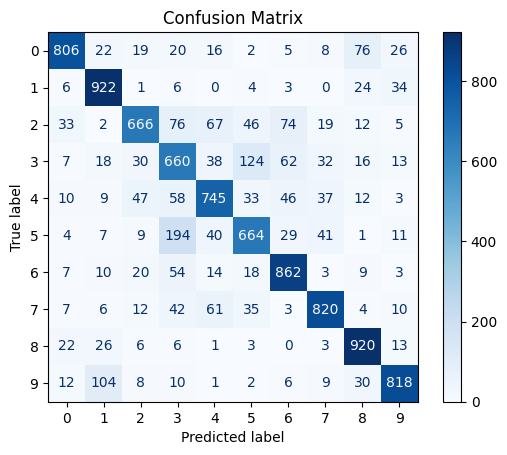

In [21]:
# Calculating confusion matrix with scikit-learn
# Note: Don't use plot_confusion_matrix - it's for an old version of scikit-learn
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Make predictions on the test set
predictions = model.predict(X_test)
y_pred = np.argmax(predictions, axis = -1)

# https://www.geeksforgeeks.org/how-to-plot-confusion-matrix-with-labels-in-sklearn/

cm = confusion_matrix(y_test_orig, y_pred)

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix = cm)
disp.plot(cmap = plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

- The object with the most accurate predictions is automobile (class 1), although this is sometimes misclassified as a truck (class 9).
- The object with the least accurate predictions is cat (class 3), which is often misclassified as dog (class 5).

# Write-up by Jeffrey Dick, 2025-02-18

- **Data preprocessing**

  - After normalizing the pixel values to be from 0 to 1, I added preprocessing step that convert RGB to BGR and zero-centers each color channel.
  - This is a necessary preprocessing step as described in the [VGG16 function documentation](https://keras.io/api/applications/vgg/#vgg16-function).
  - Instead of using scikit-learn's `train_test_split()` to create the validation set, I used the `validation_split = 0.2` parameter during model fitting to let TensorFlow generate the validation split.

- In this project I've distinguished between Transfer learning and Fine tuning.

  - **Transfer learning** uses a model composed of frozen layers from the VGG16 model and our own additional layers used for training.
  - **Fine tuning** takes place after transfer learning; it unfreezes the entire model and trains it with a low learning rate.
  - This terminology follows the [Keras Guide to Transfer learning & fine-tuning](https://keras.io/guides/transfer_learning/),

- **Transfer learning**: There are different approaches to using pre-trained layers from a model. The YouTube videos in the bootcamp curriculum build a Sequential model like this to use all but the last layer:

```
model = Sequential()
for layer in vgg16_model.layers[:-1]:
  model.add(layer)
```

However, a more canonical approach is to instantiate the model using the `VGG16()` function with the `include_top = False` option.

- **Model building**

  - To help avoid overfitting, I've added a dropout before the final output layer.

  - This is in addition to the other added layers (GlobalAveragePooling2D and Dense layers) used for training on the new data.

- **Model fitting**

  - The model is fit with an EarlyStopping callback.

  - The learning rate is decreased from 0.001 for transfer learning to 0.00001 for fine tuning.

- **Evaluation**

  - The accuracy of the **Transfer learning** model on the test set is not great (about 61%) but is still better than random.
  
  - **Fine tuning** the entire model boosts accuracy to about 79%.
  
  - The final accuracy on the test set only reaches 77% if the dropout layer is removed, showing the importance of dropout to reduce overfitting.